#  Density Distribution 

In [3]:
import MDAnalysis as mda
import numpy as np
import os
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

## System Density Distribution  

In [2]:
class SDD:
    def __init__(self, u, Startframe, Endframe, component , hist_range, num_bins):
        self.u = u
        self.Startframe= Startframe
        self.Endframe= Endframe
        self.component = component
        self.hist_range= hist_range
        self.num_bins = num_bins

    def cal_dens(self):
        histograms = []
        
        vec_x = self.u.trajectory[0].triclinic_dimensions[0]
        vec_y = self.u.trajectory[0].triclinic_dimensions[1]
        area = LA.norm(np.cross(vec_x, vec_y))

        for ts in self.u.trajectory[self.Startframe:self.Endframe]:
            component_z_coords = np.array(self.component.positions[:, 2])
            accumulated_histogram = np.zeros(self.num_bins)
            hist, bin_edges = np.histogram(
                component_z_coords,
                bins=self.num_bins,
                range=self.hist_range
            )
            histograms.append(hist)
        accumulated_histogram = np.sum(histograms, axis=0) # sum along the first axis of histograms which is the num of the components in each bin
        normalized_histogram = accumulated_histogram / (self.Endframe- self.Startframe)
        bin_width = (max(self.hist_range)-min(self.hist_range)) / self.num_bins
        density= normalized_histogram / (area*bin_width)
        return density

### Solution System

In [3]:
pdb_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb', 
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/start_drudes.pdb'
]

dcd_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/FV_NVT.dcd'
]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]
num_bins=120
hist_range_list = [(min(positions), max(positions)) for positions in electrode_z_positions_list]

solution_lists = [u.select_atoms('resname BMI') | u.select_atoms('resname BF4') | u.select_atoms('resname acn') for u in u_list]

Startframe=3000
Endframe=4999

voltage_name= [0.5, 1, 1.5, 2]

ddp_list= []

for i, component in enumerate(solution_lists):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component, hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'Solution System Density Profile.dat'
        out_path = f'sim_output postion & trajectory & charge/sim_output_v{voltage_name[j]}_ns_50'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")


/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader current

### Whole Molecules

In [13]:
pdb_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb', 
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/start_drudes.pdb'
]

dcd_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/FV_NVT.dcd'
]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]
num_bins=120
hist_range_list = [(min(positions), max(positions)) for positions in electrode_z_positions_list]

BMI_lists = [u.select_atoms('resname BMI ') for u in u_list]

BF4_lists = [u.select_atoms('resname BF4 ') for u in u_list]

ACN_lists = [u.select_atoms('resname acn ') for u in u_list]

Startframe=3000
Endframe=4999

voltage_name= [0.5, 1, 1.5, 2]
filenames= ['BMI', 'BF4', 'ACN']
ddp_list= []

# Loop through components
for i, component in enumerate([BMI_lists, BF4_lists, ACN_lists]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'sim_output postion & trajectory & charge/sim_output_v{voltage_name[j]}_ns_50'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")


### Functional Groups

#### BMI+

In [51]:
pdb_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb', 
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/start_drudes.pdb'
]

dcd_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/FV_NVT.dcd'
]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]
num_bins=120
hist_range_list = [(min(positions), max(positions)) for positions in electrode_z_positions_list]

BMI_Im_lists = [u.select_atoms('resname BMI and (name N1 or name N11 or name C1 or name H1 or name C2 or name H2 or name C21 or name H21)') for u in u_list]
BMI_CH3_lists = [u.select_atoms('resname BMI and (name C3 or name H3 or name H31 or name H32)') for u in u_list]
BMI_C4H9_lists = [u.select_atoms('resname BMI and (name C5 or name H5 or name H51 or name C51 or name H52 or name H53 or name C6 or name H6 or name H61 or name H62)') for u in u_list]

Startframe=3000
Endframe=4999

voltage_name= [0.5, 1, 1.5, 2]
filenames= ['BMI_Im', 'BMI_CH3', 'BMI_C4H9']
ddp_list= []

# Loop through components
for i, component in enumerate([BMI_Im_lists, BMI_CH3_lists, BMI_C4H9_lists]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'sim_output postion & trajectory & charge/sim_output_v{voltage_name[j]}_ns_50'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")

#### ACN

In [52]:
pdb_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb', 
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/start_drudes.pdb'
]

dcd_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/FV_NVT.dcd'
]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]
num_bins=120
hist_range_list = [(min(positions), max(positions)) for positions in electrode_z_positions_list]

acn_N_lists = [u.select_atoms('resname acn and (name NZ)') for u in u_list]
acn_C_lists = [u.select_atoms('resname acn and (name CT)') for u in u_list]
acn_CH3_lists = [u.select_atoms('resname acn and (name CZ or name HZ1 or name HZ2 )') for u in u_list]

Startframe=3000
Endframe=4999

voltage_name= [0.5, 1, 1.5, 2]
filenames= ['acn_N', 'acn_C', 'acn_CH3']
ddp_list= []

# Loop through components
for i, component in enumerate([acn_N_lists, acn_C_lists, acn_CH3_lists]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'sim_output postion & trajectory & charge/sim_output_v{voltage_name[j]}_ns_50'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")

## Density Distribution Plot Class

In [4]:
class NTD:
    def __init__(self, filename):
        self.filename = filename
    
    def NTDV_list(self):
        NTDV_list = []
        with open(self.filename, 'r') as NTD_data:
            for line in NTD_data:
                value = float(line.strip())
                NTDV_list.append(value)
        return NTDV_list

class DDP:
    def __init__(self, component_name, left_data, right_data, bin_width, x_0, x_l, y_0, y_l):
        self.component_name= component_name
        self.left_data = left_data
        self.right_data = right_data
        self.bin_width = bin_width
        self.x_0 = x_0
        self.x_l = x_l
        self.y_0 = y_0
        self.y_l = y_l
        
        
    def w_m_plot(self):
        
        plt.figure(figsize=(12, 4))
        
        left_subplot = plt.subplot(1, 2, 1)
        left_subplot.set_xlabel("Distance from the cathode ($\AA$)")
        left_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
        left_subplot.set_title(f'{self.component_name} Density Profile')
        left_subplot.set_xlim(self.x_0, self.x_l)
        left_subplot.set_ylim(self.y_0,self.y_l)
        left_subplot.spines['right'].set_visible(False)
        left_subplot.spines['top'].set_visible(False)

        right_subplot = plt.subplot(1, 2, 2)
        right_subplot.set_xlabel("Distance from the anode ($\AA$)")
        right_subplot.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
        right_subplot.set_title(f'{self.component_name} Density Profile')
        right_subplot.set_xlim(self.x_0, self.x_l)
        right_subplot.set_ylim(self.y_0,self.y_l)
        right_subplot.spines['left'].set_visible(False)
        right_subplot.spines['top'].set_visible(False)
            
        for densities, subplot in [(self.left_data, left_subplot), (self.right_data, right_subplot)]:
            voltages = [0.5 ,1.0, 1.5, 2.0]
            colors = ['g', 'k', 'b', 'r']
            linestyles= [ '-','--', '-.', '-']
            for i in range(len(voltages)):
                subplot.plot(
                    np.arange(0, len(densities[i])) * self.bin_width,
                    densities[i],
                    lw="1.0",
                    label=f'{voltages[i]/2} / -{voltages[i]/2} V',
                    linestyle=linestyles[i],
                    color=colors[i]
                )
        
        
        plt.gca().invert_xaxis()
        plt.gca().yaxis.tick_right()
        plt.gca().yaxis.set_label_position("right")
        # Add legends
        left_subplot.legend(fontsize=10, frameon=False, ncol=2)
        # right_subplot.legend(frameon=False)
        plt.text(0.5, 0.5, '//',fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gcf().transFigure)

        # Show the plots
        plt.tight_layout()
        plt.show()
        
    def f_g_plot(self, molename, y_shift):
        
        plt.figure(figsize=(12, 4))  # Increase figure height to accommodate both subplots
        left_ax = plt.subplot(1, 2, 1)
        right_ax = plt.subplot(1, 2, 2)  # Share y-axis with the left subplot

        left_ax.set_xlabel("Distance from the cathode ($\AA$)")
        left_ax.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
        left_ax.set_title(f'{molename} Density Profiles')
        left_ax.set_xlim(self.x_0, self.x_l)
        left_ax.set_ylim(self.y_0, self.y_l)
        left_ax.spines['right'].set_visible(False)
        left_ax.spines['top'].set_visible(False)

        right_ax.set_xlabel("Distance from the anode ($\AA$)")
        right_ax.set_ylabel("Density $(N_{ion}/(\AA^{3}))$")
        right_ax.set_title(f'{molename} Density Profiles')
        right_ax.set_xlim(self.x_0, self.x_l)
        right_ax.set_ylim(self.y_0, self.y_l)
        right_ax.spines['left'].set_visible(False)
        right_ax.spines['top'].set_visible(False)
        right_ax.yaxis.tick_right()
        right_ax.yaxis.set_label_position("right")

        voltages = [0.5, 1.0, 1.5, 2.0]
        colors = ['g', 'r', 'k']
        linestyles = ['-', '--', '-.', '-']

        for k in range(len(voltages)):
            for i in range(len(self.left_data)):
                label = f'{voltages[k]/2} / -{voltages[k]/2} V' if i == 0 else None
                left_ax.plot(
                    np.arange(0, len(self.right_data[i][k])) * self.bin_width,
                    [val + i * y_shift for val in self.left_data[i][k]],
                    lw="1.0",
                    label= label,
                    linestyle=linestyles[k],
                    color=colors[i]
                )

                right_ax.plot(
                    np.arange(0, len(self.right_data[i][k])) * self.bin_width,
                    [val + i * y_shift for val in self.right_data[i][k]],
                    lw="1.0",
                    linestyle=linestyles[k],
                    color=colors[i]
                )

        # Set plot properties
        plt.gca().invert_xaxis()
        plt.gca().yaxis.tick_right()
        plt.gca().yaxis.set_label_position("right")
        left_ax.legend(fontsize=10, frameon=False, ncol=2)
        plt.text(0.5, 0.5, '//',fontsize=12, horizontalalignment='center', verticalalignment='center', transform=plt.gcf().transFigure)
        # Show the plot
        plt.tight_layout()
        plt.show()

## Density Distribution Plots 50 ns

### Solution System density distribution

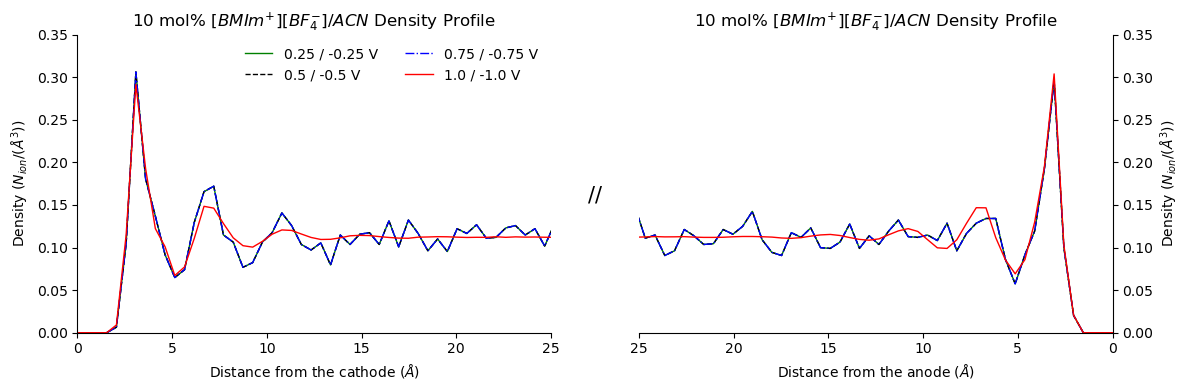

In [29]:
filenames= ['Solution System']
y_ls=[0.35]

for i, component_name in enumerate(filenames):
    NTVD = [f'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/{component_name} Density Profile.dat',
            f'sim_output postion & trajectory & charge/sim_output_v1_ns_50/{component_name} Density Profile.dat',
            f'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/{component_name} Density Profile.dat',
            f'sim_output postion & trajectory & charge/sim_output_v2_ns_50/{component_name} Density Profile.dat'
          ]

    NTD_list = []

    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb'
    dcd_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd'
    u = mda.Universe(pdb_v1, dcd_v1)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))

    density_list = []
    left_densities = []
    right_densities = []
    for j in range(len(NTD_list)):
        density_list.append(NTD_list[j])
        left_densities.append(density_list[j][:num_bins // 2])
        right_densities.append(density_list[j][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    # Use the current y_l value
    y_l = y_ls[i]

    # Use the component_name as the title and output file name
    ddp = DDP('10 mol% $[BMIm^{+}] [BF_{4}^{-}] / ACN $', left_data, right_data, bin_width, x_0=0, x_l=25, y_0=0, y_l=y_l)
    ddp.w_m_plot()

### Whole Molecule density distribution

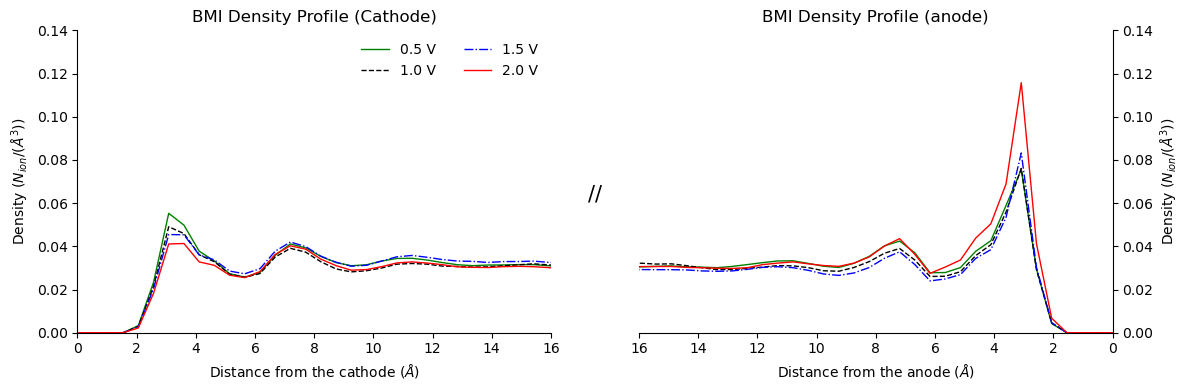

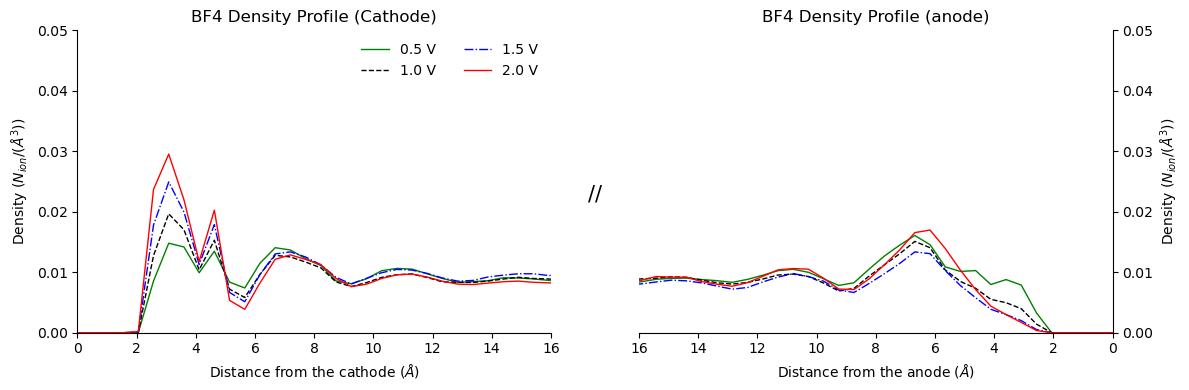

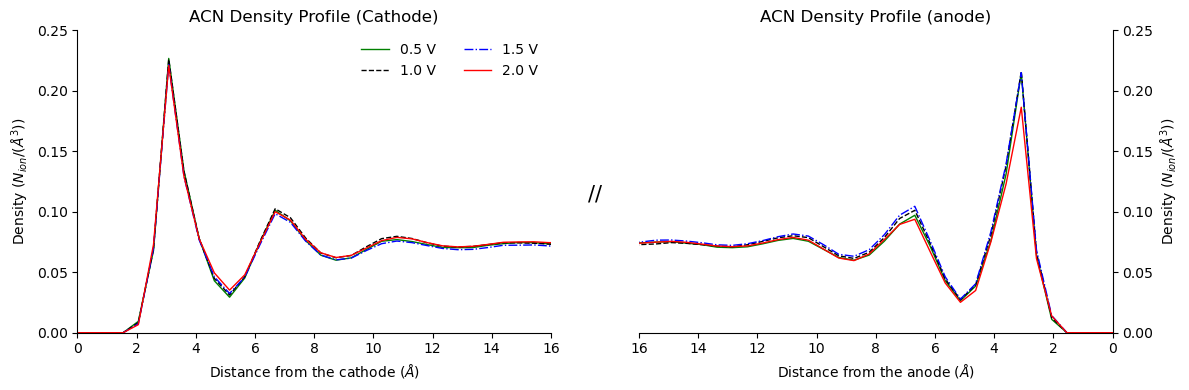

In [20]:
filenames = ['BMI', 'BF4', 'ACN']
y_ls = [0.14, 0.05, 0.25]

# Loop through component names
for i, component_name in enumerate(filenames):
    NTVD = [f'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/{component_name} Density Profile.dat',
            f'sim_output postion & trajectory & charge/sim_output_v1_ns_50/{component_name} Density Profile.dat',
            f'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/{component_name} Density Profile.dat',
            f'sim_output postion & trajectory & charge/sim_output_v2_ns_50/{component_name} Density Profile.dat'
          ]

    NTD_list = []

    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb'
    dcd_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd'
    u = mda.Universe(pdb_v1, dcd_v1)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))

    density_list = []
    left_densities = []
    right_densities = []
    for j in range(len(NTD_list)):
        density_list.append(NTD_list[j])
        left_densities.append(density_list[j][:num_bins // 2])
        right_densities.append(density_list[j][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    # Use the current y_l value
    y_l = y_ls[i]

    # Use the component_name as the title and output file name
    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=y_l)
    ddp.w_m_plot()

### Functional Groups Density Distribution

#### BMI+

/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader current

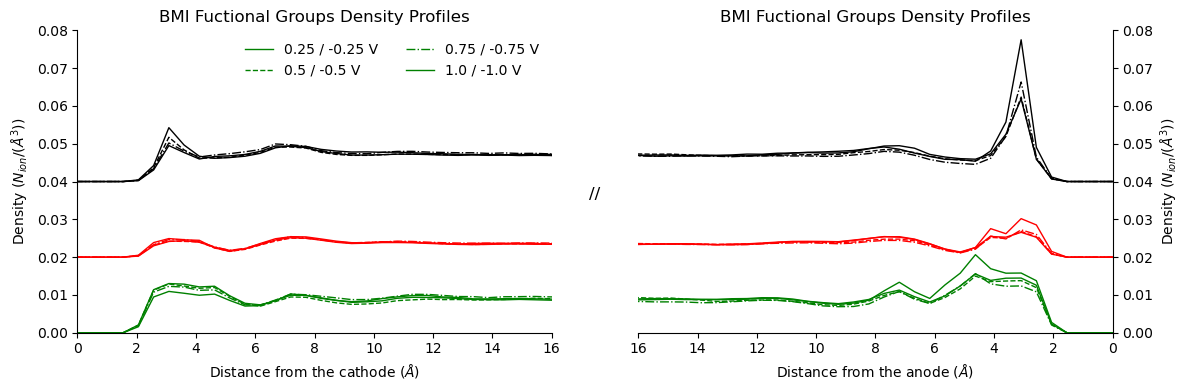

In [5]:
functional_group_filenames = ['BMI_C4H9', 'BMI_CH3' ,'BMI_Im']

# Create an instance of DDP for each functional group
ddp_instances = []
for component_name in functional_group_filenames:
    NTVD = [
        f'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/{component_name} Density Profile.dat',
        f'sim_output postion & trajectory & charge/sim_output_v1_ns_50/{component_name} Density Profile.dat',
        f'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/{component_name} Density Profile.dat',
        f'sim_output postion & trajectory & charge/sim_output_v2_ns_50/{component_name} Density Profile.dat'
    ]

    NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb'
    dcd_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd'
    u = mda.Universe(pdb_v1, dcd_v1)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))
    density_list = []
    left_densities = []
    right_densities = []
    for k in range(len(NTD_list)):
        density_list.append(NTD_list[k])
        left_densities.append(density_list[k][:num_bins // 2])
        right_densities.append(density_list[k][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.14)
    ddp_instances.append(ddp)

# Accumulate data for cathode and anode
combined_left_data = [ddp.left_data for ddp in ddp_instances]
combined_right_data = [ddp.right_data for ddp in ddp_instances]

# print(len(combined_right_data[0]))
# Combine all functional groups in one plot
combined_ddp = DDP(component_name, combined_left_data, combined_right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.08)
combined_ddp.f_g_plot(molename='BMI Fuctional Groups', y_shift= 0.02)

#### ACN

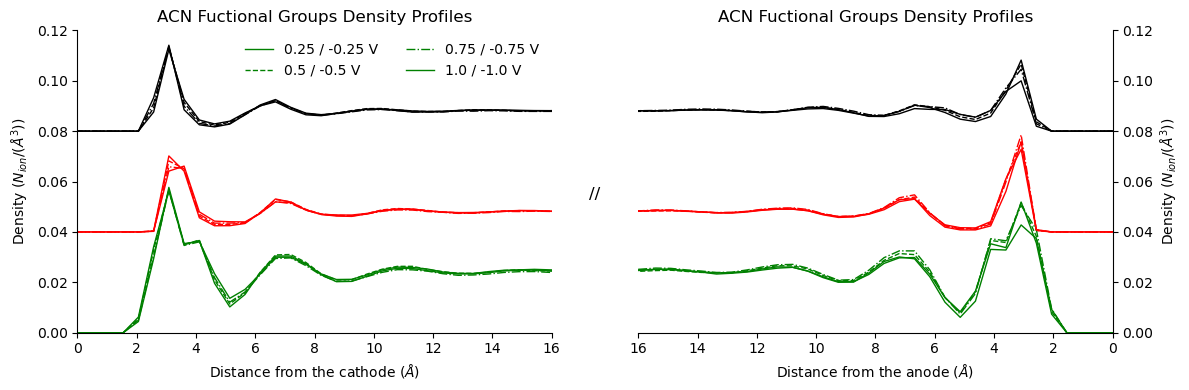

In [6]:
# List of functional group filenames
functional_group_filenames = ['acn_CH3', 'acn_C', 'acn_N']

# Create an instance of DDP for each functional group
ddp_instances = []
for component_name in functional_group_filenames:
    NTVD = [
        f'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/{component_name} Density Profile.dat',
        f'sim_output postion & trajectory & charge/sim_output_v1_ns_50/{component_name} Density Profile.dat',
        f'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/{component_name} Density Profile.dat',
        f'sim_output postion & trajectory & charge/sim_output_v2_ns_50/{component_name} Density Profile.dat'
    ]

    NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb'
    dcd_v1 = 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd'
    u = mda.Universe(pdb_v1, dcd_v1)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))
    density_list = []
    left_densities = []
    right_densities = []
    for k in range(len(NTD_list)):
        density_list.append(NTD_list[k])
        left_densities.append(density_list[k][:num_bins // 2])
        right_densities.append(density_list[k][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.14)
    ddp_instances.append(ddp)

# Accumulate data for cathode and anode
combined_left_data = [ddp.left_data for ddp in ddp_instances]
combined_right_data = [ddp.right_data for ddp in ddp_instances]

# print(len(combined_right_data[0]))
# Combine all functional groups in one plot
combined_ddp = DDP(component_name, combined_left_data, combined_right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.12)
combined_ddp.f_g_plot(molename='ACN Fuctional Groups', y_shift= 0.04)

# Radial Distribution plot (3D of density distribution)

In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Anion-Cation RDFs Calculation Class

In [2]:
class RDFs:
    def __init__(self, u, Startframe, Endframe, adsorbed_atoms, surrounded_atoms, electrode_z_positions, first_peak_dist):
        self.u= u
        self.Startframe= Startframe
        self.Endframe= Endframe
        self.adsorbed_atoms= adsorbed_atoms
        self.surrounded_atoms= surrounded_atoms
        self.electrode_z_positions=  electrode_z_positions
        self.first_peak_dist= first_peak_dist

    def cal_rdfs_CaA(self):
        rdf_results_CaA = []
        for ts in self.u.trajectory[self.Startframe:self.Endframe]:
            adsorbed_atoms_z_coords = np.array(self.adsorbed_atoms.positions[:, 2])
            adsorbed_atoms_apt = [apt_prober for apt_prober in adsorbed_atoms_z_coords if apt_prober <= (min(self.electrode_z_positions) + self.first_peak_dist)]
            z_mask = np.array([apt_prober in adsorbed_atoms_apt for apt_prober in adsorbed_atoms_z_coords])
            filtered_atoms = self.adsorbed_atoms.atoms[z_mask]
            irdf = rdf.InterRDF(self.surrounded_atoms, filtered_atoms, nbins=120, range=(0.0, 15.0))
        irdf.run()
        rdf_results_CaA.append(irdf)
        return rdf_results_CaA
    
    def cal_rdfs_AaC(self):
        rdf_results_AaC = []
        for ts in self.u.trajectory[self.Startframe:self.Endframe]:
            adsorbed_atoms_z_coords = np.array(self.adsorbed_atoms.positions[:, 2])
            adsorbed_atoms_apt = [apt_prober for apt_prober in adsorbed_atoms_z_coords if apt_prober >= (max(self.electrode_z_positions) - self.first_peak_dist)]
            z_mask = np.array([apt_prober in adsorbed_atoms_apt for apt_prober in adsorbed_atoms_z_coords])
            filtered_atoms = self.adsorbed_atoms.atoms[z_mask]
            irdf = rdf.InterRDF(self.surrounded_atoms, filtered_atoms, nbins=120, range=(0.0, 15.0))
        irdf.run()
        rdf_results_AaC.append(irdf)
        return rdf_results_AaC
    
    

In [9]:
pdb_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb', 
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v3_ns_50/start_drudes.pdb',
    'sim_output postion & trajectory & charge/sim_output_v4_ns_50/start_drudes.pdb'
    
]

dcd_files = [
    'sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v2_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v3_ns_50/FV_NVT.dcd',
    'sim_output postion & trajectory & charge/sim_output_v4_ns_50/FV_NVT.dcd'
]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]

BMI_lists = [u.select_atoms('resname BMI and (name C1 or name C2 or name C21)') for u in u_list]
BF4_lists = [u.select_atoms('resname BF4 and (name B)') for u in u_list]
Startframe = 3000
Endframe= 4999
first_peak_dist=[4, 6]
rdf_results_CaA = []
rdf_results_AaC = []

for i in range(len(u_list)):
    RDFs_CaA= RDFs(u_list[i], Startframe, Endframe, BF4_lists[i], BMI_lists[i] , electrode_z_positions_list[i], first_peak_dist[0])
    rdf_results_CaA.extend(RDFs_CaA.cal_rdfs_CaA())

for i in range(len(u_list)):
    RDFs_AaC= RDFs(u_list[i], Startframe, Endframe, BMI_lists[i], BF4_lists[i] , electrode_z_positions_list[i], first_peak_dist[1])
    rdf_results_AaC.extend(RDFs_AaC.cal_rdfs_AaC())
    

## Anion-Cation RDFs Plots Class

In [10]:
class RPS:
    def __init__(self, rdf_results_CaA, rdf_results_AaC, cation_name, anion_name):
        self.rdf_results_CaA= rdf_results_CaA
        self.rdf_results_AaC= rdf_results_AaC
        self.cation_name= cation_name
        self.anion_name= anion_name

    def plot_rdfs_CaA(self,voltages, colors, linestyles):
            rdf_results_CaA= self.rdf_results_CaA

            fig, ax = plt.subplots() 

            for idx, irdf in enumerate(rdf_results_CaA):
                plt.plot(irdf.results.bins, irdf.results.rdf, label=f'{voltages[idx]} V', color=colors[idx], linestyle=linestyles[idx],lw=1.2)

            plt.xlim(0.0,12.0)
            plt.ylim(0.0,10.0)
            ax.xaxis.set_major_locator(plt.MultipleLocator(1))   
            ax.yaxis.set_major_locator(plt.MultipleLocator(1))
            plt.xlabel('r $(\AA)$')
            plt.ylabel('g(r)')
            plt.title(f'RDF of {self.cation_name} around adsorbed {self.anion_name} ')
            plt.legend(frameon=False)
            plt.show()
        
    def plot_rdfs_AaC(self, voltages, colors, linestyles):
        rdf_results_AaC= self.rdf_results_AaC
        
        fig, ax = plt.subplots()
        for idx, irdf in enumerate(rdf_results_AaC): 
            plt.plot(irdf.results.bins, irdf.results.rdf, label=f'{voltages[idx]} V', color=colors[idx], linestyle=linestyles[idx],lw=1.2)

        plt.xlim(0.0,12.0)
        plt.ylim(0.0,10.0)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))   
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        plt.xlabel('r $(\AA)$')
        plt.ylabel('g(r)')
        plt.title(f'RDF of {self.anion_name} around adsorbed {self.cation_name} ')
        plt.legend(frameon=False)
        plt.show()

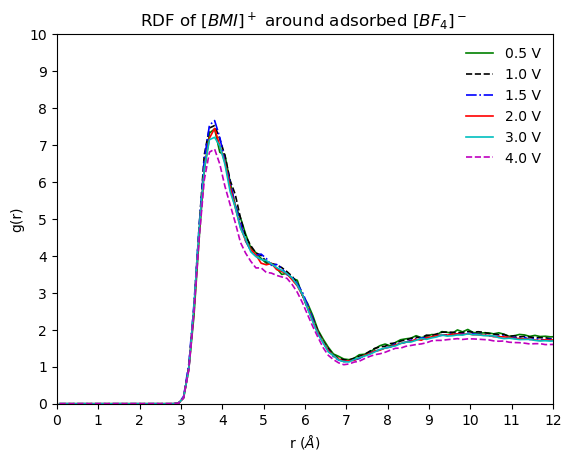

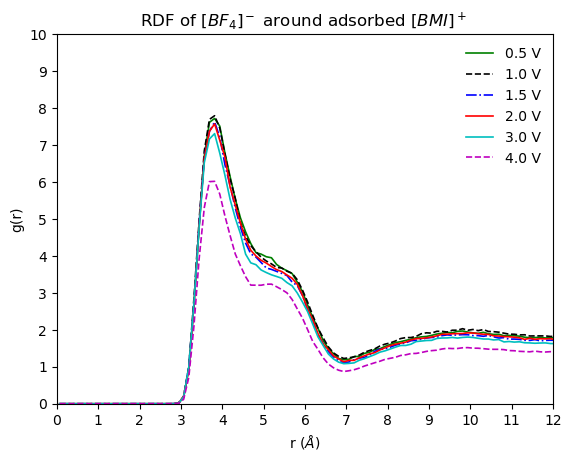

In [11]:
voltages = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0]
colors = ['g', 'k', 'b', 'r','c', 'm','y']
linestyles= ['-', '--', '-.', '-', '-', '--', '-.']
cation_name= '$[BMI]^+$'
anion_name= '$[BF_4]^-$'

RPS_CaA= RPS(rdf_results_CaA, rdf_results_AaC, cation_name, anion_name)
RPS_CaA.plot_rdfs_CaA(voltages, colors, linestyles)

RPS_AaC= RPS(rdf_results_AaC, rdf_results_AaC, cation_name, anion_name)
RPS_AaC.plot_rdfs_AaC(voltages, colors, linestyles)

#  Charge Density Distribution

In [3]:
import MDAnalysis as mda
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## System Total Charge Class

In [4]:
class STC:
    def __init__(self, u, Startframe, Endframe, pdb, pdb_bd, forcefield, num_bins, solution_list, hist_range):
        self.u= u
        self.Startframe= Startframe
        self.Endframe = Endframe
        self.pdb= pdb
        self.pdb_bd= pdb_bd
        self.forcefield= forcefield
        self.num_bins= num_bins
        self.solution_list= solution_list
        self.hist_range= hist_range
        
    def cal_cd(self):
        pdb = PDBFile(self.pdb)
        pdb.topology.loadBondDefinitions(self.pdb_bd[0])
        pdb.topology.loadBondDefinitions(self.pdb_bd[1])
        pdb.topology.loadBondDefinitions(self.pdb_bd[2])
        pdb.topology.loadBondDefinitions(self.pdb_bd[3])
        pdb.topology.createStandardBonds()
        modeller = Modeller(pdb.topology, pdb.positions)
        
        # forcefield = ForceField('ffdir/graph_c_freeze.xml','ffdir/graph_n_freeze.xml', 'ffdir/graph_s_freeze.xml','ffdir/sapt_noDB_2sheets.xml')
        # modeller.addExtraParticles(forcefield)
        
        # Load forcefield from multiple files
        forcefield = ForceField(*self.forcefield)

        # Add extra particles to the modeller
        modeller.addExtraParticles(forcefield)
        
        system = forcefield.createSystem(modeller.topology, nonbondedCutoff=1.4*nanometer, constraints=None, rigidWater=True)
        nbondedForce = [f for f in [system.getForce(i) for i in range(system.getNumForces())] if type(f) == NonbondedForce][0]
        # this is not important, this is just to create openmm object that we can use to access topology
        integ_md = DrudeLangevinIntegrator(300, 1/picosecond, 1*kelvin, 1/picosecond, 0.001*picoseconds)
        platform = Platform.getPlatformByName('CPU')
        simmd = Simulation(modeller.topology, system, integ_md, platform)
        
        vec_x = self.u.trajectory[self.Startframe].triclinic_dimensions[0]
        vec_y = self.u.trajectory[self.Startframe].triclinic_dimensions[1]
        area = LA.norm( np.cross(vec_x, vec_y) )

        solution_list= self.solution_list
        num_bins = self.num_bins
        accumulated_total_charge=np.zeros(num_bins)

        for ts in self.u.trajectory[self.Startframe:self.Endframe]:
            positions = []
            charge_data = []

            for solutions in solution_list:
                z_coord = solutions.positions[:, 2]
                positions.extend(z_coord)

                # Find the charge data corresponding to the current component
                component_charge_data = []
                for atom in solutions.atoms:
                    charge, _, _ = nbondedForce.getParticleParameters(atom.index)
                    component_charge_data.append(charge._value)

                charge_data.extend(component_charge_data)

            # Now, 'positions' contains all positions, and 'charge_data' contains corresponding charge data
            # hist_pos, bins_pos = np.histogram(positions, bins=num_bins)
            # You can use 'charge_data' as needed, for example, to accumulate charge in each bin
            total_charge_in_bins = np.histogram(positions, bins=num_bins, range=self.hist_range, weights=charge_data)[0]
            accumulated_total_charge += total_charge_in_bins
        sys_total_charge= accumulated_total_charge / (self.Endframe-self.Startframe)
        return sys_total_charge

In [5]:
pdb_files = [
    "sim_output postion & trajectory & charge/sim_output_v0_ns_50/start_drudes.pdb"
]

dcd_files = [
    'sim_output postion & trajectory & charge/sim_output_v0_ns_50/FV_NVT.dcd',
]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]

hist_range_list = [(min(positions), max(positions)) for positions in electrode_z_positions_list]

solution_lists = [
    [u.select_atoms('resname grp and segid A'),
     u.select_atoms('resname grp and segid B'),
     u.select_atoms('resname BMI '),
     u.select_atoms('resname BF4 '),
     u.select_atoms('resname acn ')] for u in u_list
]
Startframe=3000
Endframe=4999

pdb= 'nvt_0V_15ns.pdb'
pdb_bd= ['ffdir/graph_residue_c.xml', 'ffdir/graph_residue_n.xml', 'ffdir/graph_residue_s.xml', 'ffdir/sapt_residues.xml']
forcefield=['ffdir/graph_c_freeze.xml','ffdir/graph_n_freeze.xml','ffdir/graph_s_freeze.xml','ffdir/sapt_noDB_2sheets.xml']
num_bins= 120

cd_list = []
file_name = "normalized_total_charge.dat"
voltage_name= [0]

for i, u in enumerate(u_list):
    stc = STC(u, Startframe, Endframe, pdb, pdb_bd, forcefield, num_bins, solution_lists[i], hist_range_list[i])
    cd_list.append(stc.cal_cd())
    
    outPath=f'sim_output postion & trajectory & charge/sim_output_v{voltage_name[i]}_ns_50'
    output_file = os.path.join(outPath, file_name)
    with open(output_file, "w") as file:
        for value in cd_list[i]:
            file.write(f"{value}\n")
    

/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader current

## Charge density Plot Class

In [9]:
class NTC:
    def __init__(self, filename):
        self.filename = filename
    
    def NTCV_list(self):
        NTCV_list = []
        with open(self.filename, 'r') as NTC_data:
            for line in NTC_data:
                value = float(line.strip())
                NTCV_list.append(value)
        return NTCV_list

class CDP:
    def __init__(self, left_data, right_data, bin_width, x_0, x_l, y_0, y_l):
        self.left_data = left_data
        self.right_data = right_data
        self.bin_width = bin_width
        self.x_0 = x_0
        self.x_l = x_l
        self.y_0 = y_0
        self.y_l = y_l

    def plot(self, voltages, linestyles, colors):
        plt.figure(figsize=(12, 4))
        
        # Create the left subplot
        left_subplot = plt.subplot(1, 2, 1)
        left_subplot.set_xlabel("Distance from the cathode ($\AA$)")
        left_subplot.set_ylabel("Charge $ (e/(nm^{3}))$ ")
        left_subplot.axhline(0, color='black', linestyle='--', lw=0.5)
        left_subplot.set_title('10 mol% $[BMIm^{+}] [BF_{4}^{-}] / ACN$')
        left_subplot.spines['right'].set_visible(False)
        left_subplot.spines['top'].set_visible(False)
        left_subplot.set_ylim(self.y_0, self.y_l)
        left_subplot.set_xlim(self.x_0, self.x_l)

        # Create the right subplot
        right_subplot = plt.subplot(1, 2, 2)
        right_subplot.set_xlabel("Distance from the anode ($\AA$)")
        right_subplot.set_ylabel("Charge $ (e/(nm^{3}))$")
        right_subplot.axhline(0, color='black', linestyle='--', lw=0.5)
        right_subplot.set_title('10 mol% $[BMIm^{+}] [BF_{4}^{-}] / ACN$')
        right_subplot.spines['left'].set_visible(False)
        right_subplot.spines['top'].set_visible(False)
        right_subplot.set_ylim(self.y_0, self.y_l)
        right_subplot.set_xlim(self.x_0, self.x_l)
        
        for densities, subplot in [(self.left_data, left_subplot), (self.right_data, right_subplot)]:
            for i in range(len(voltages)):
                subplot.plot(
                    np.arange(0, len(densities[i])) * self.bin_width,
                    densities[i],
                    lw="1.0",
                    label=f'{voltages[i]/2}/-{voltages[i]/2} V',
                    linestyle=linestyles[i],
                    color=colors[i]
                )

        plt.gca().invert_xaxis()
        plt.gca().yaxis.tick_right()
        plt.gca().yaxis.set_label_position("right")

        # Add legends
        left_subplot.legend(fontsize=10, frameon=False, ncol=2)
        # right_subplot.legend(frameon=False)
        plt.text(0.5, 0.5, '//',fontsize=15, horizontalalignment='center', verticalalignment='center',transform=plt.gcf().transFigure)

        # Show the plots
        plt.tight_layout()
        plt.show()

## Charge density Plot 50ns

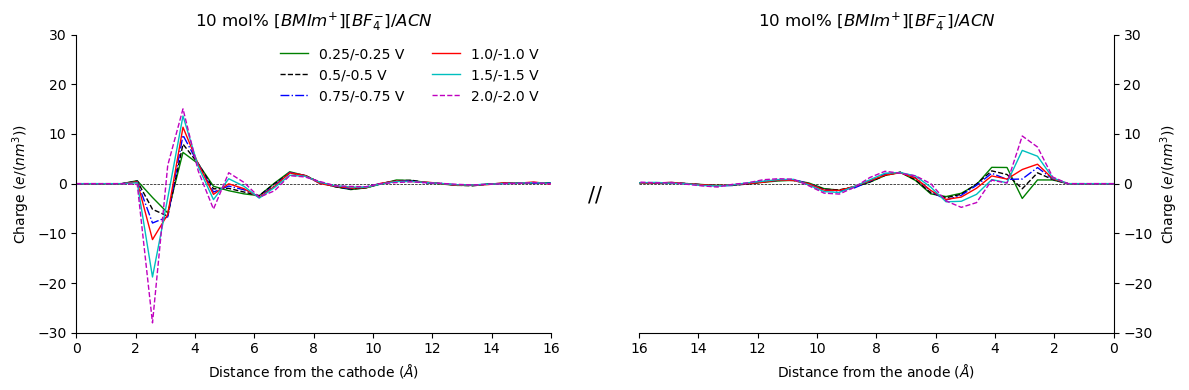

In [15]:
NTCV = ["sim_output postion & trajectory & charge/sim_output_v0_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v1_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v2_ns_50/normalized_total_charge.dat",
    'sim_output postion & trajectory & charge/sim_output_v3_ns_50/normalized_total_charge.dat',
    'sim_output postion & trajectory & charge/sim_output_v4_ns_50/normalized_total_charge.dat',
      ]

NTC_list=[]

for i in range(len(NTCV)):
    NTCV_list = NTC(NTCV[i])
    NTCV_lists = NTCV_list.NTCV_list()
    NTC_list.append(NTCV_lists)

pdb_v1= 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb'
dcd_v1= 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd'
u= mda.Universe(pdb_v1,dcd_v1)
grp_A = u.select_atoms('resname grp and segid A')
grp_B = u.select_atoms('resname grp and segid B')
grp_AB = grp_A | grp_B
electrode_z_positions = np.array(grp_AB.positions[:, 2])
midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
num_bins = 120
bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
vec_x = u.trajectory[0].triclinic_dimensions[0]
vec_y = u.trajectory[0].triclinic_dimensions[1]
area = LA.norm( np.cross(vec_x, vec_y) )

charge_density_list=[]
left_densities=[]
right_densities=[]
for i in range(len(NTC_list)):
    charge_density_list.append(np.array(NTC_list[i])*1000/(area*bin_width))
    left_densities.append(charge_density_list[i][:num_bins // 2])
    right_densities.append(charge_density_list[i][num_bins // 2:][::-1])


left_data = left_densities
right_data = right_densities
voltages = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0]
colors = ['g', 'k', 'b', 'r','c', 'm','y']
linestyles= ['-', '--', '-.', '-', '-', '--', '-.']

cdp = CDP(left_data, right_data, bin_width, x_0=0, x_l=16, y_0=-30, y_l=30)
cdp.plot(voltages, linestyles, colors)

# Poisson potential of the charge distribution (Solve possion potential by integration two times)
$$\frac{d^{2}V(z)}{dz^2}= -4\pi \rho (z)$$
$$\Rightarrow dE(z)=  -4\pi \int_{z_{0}=pos_{cat}}^{z_{t}=pos_{anod}}\rho(z)dz + C_{0}=  -4\pi (\int_{z_{0}=pos_{cat}}^{z_{t}=\infty}\rho(z)dz + \int_{z_{0}=-\infty}^{z_{t}=pos_{anod}}\rho(z)dz +C_{0})$$
$$\Rightarrow V(z)=  \int_{z_{0}=pos_{cat}}^{z_{t}=pos_{anod}}dE(z)dz + C_{1}$$
Boundary Conditions $$C_0 = \frac{\sigma}{4\pi}=E^{right}_{z} - E^{left}_{z} \Rightarrow E^{right}_{z} = \frac{\sigma}{4\pi} -  \frac{\Delta V_{app}}{L_{gap}}$$
$$ C_{1} = V_{init} = \frac{\Delta V_{app}}{2}$$

In [16]:
import numpy as np
import MDAnalysis as mda
from openmm.app import *
from openmm import *
from openmm.unit import *
from scipy.integrate import quad
import MDAnalysis as mda
from scipy.integrate import simps
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Electrode Total Charge 

In [17]:
class ETC:
    def __init__(self, electrode_total_charge_files, voltage_levels, Startframe):
        self.electrode_total_charge_files = electrode_total_charge_files
        self.voltage_levels= voltage_levels
        self.Startframe= Startframe
        
    def cal_CTC(self):
        for i, file_path in enumerate(self.electrode_total_charge_files):
            # Variables to store total charge and line count
            total_charge_sum = 0.0
            line_count = 0
            start_processing = False
            # Read the file line by line
            with open(file_path, 'r') as file:
                for line in file:
                    pattern= f'{self.Startframe} iteration'
                    if pattern in line:
                        start_processing = True
                        continue  # Skip the line containing the pattern

                    # Check if we should start processing lines
                    if start_processing:
                        if 'cathode' in line:
                            # Extract numeric and analytic charges from the line
                            parts = line.split()
                            if len(parts) >= 5 and parts[0] == "Q_numeric" and parts[2] == "Q_analytic":
                                Q_numeric = float(parts[-1]) # Q_analytic is for verifying the Q_numeric
                                
                                # Add the average charge to the total sum
                                total_charge_sum += Q_numeric

                                # Increment the line count
                                line_count += 1

            # Calculate the overall average charge for the current file
            if line_count > 0:
                average_total_cathode_charge = total_charge_sum / line_count
                voltage_level = self.voltage_levels[i]
                # print(f'lines count {line_count}')
                print(f"Average Total Cathode Charge in Applied Voltage ({voltage_level}):", average_total_cathode_charge)
            else:
                print(f"No valid lines found in the file: {file_path}")
    
    def cal_ATC(self):
        for i, file_path in enumerate(self.electrode_total_charge_files):
            # Variables to store total charge and line count
            total_charge_sum = 0.0
            line_count = 0
            start_processing = False
            # Read the file line by line
            with open(file_path, 'r') as file:
                for line in file:
                    pattern= f'{self.Startframe} iteration'
                    if pattern in line:
                        start_processing = True
                        continue  # Skip the line containing the pattern

                    # Check if we should start processing lines
                    if start_processing:
                        if 'anode' in line:
                            # Extract numeric and analytic charges from the line
                            parts = line.split()
                            if len(parts) >= 5 and parts[0] == "Q_numeric" and parts[2] == "Q_analytic":
                                Q_numeric = float(parts[-1]) # Q_analytic is for verifying the Q_numeric

                                # Add the average charge to the total sum
                                total_charge_sum += Q_numeric

                                # Increment the line count
                                line_count += 1

            # Calculate the overall average charge for the current file
            if line_count > 0:
                average_total_anode_charge = total_charge_sum / line_count
                voltage_level = self.voltage_levels[i]
                # print(f'lines count {line_count}')
                print(f"Average Total Anode Charge in Applied Voltage ({voltage_level}):", average_total_anode_charge)
            else:
                print(f"No valid lines found in the file: {file_path}")

### 50 ns

In [20]:
electrode_total_charge_files = ["sim_output postion & trajectory & charge/sim_output_v0_ns_50/energy_v0_ns50.log",
    "sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/energy_v0.5_ns50.log",
    "sim_output postion & trajectory & charge/sim_output_v1_ns_50/energy_v1_ns50.log",
    "sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/energy_v1.5_ns50.log",
    "sim_output postion & trajectory & charge/sim_output_v2_ns_50/energy_v2_ns50.log",
    "sim_output postion & trajectory & charge/sim_output_v3_ns_50/energy_v3_ns50.log",
    "sim_output postion & trajectory & charge/sim_output_v4_ns_50/energy_v4_ns50.log"
                         ]
voltage_levels = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0]  # Corresponding voltage levels for each file
Startframe= 3000
CTC_ns50= ETC(electrode_total_charge_files, voltage_levels, Startframe)
CTC_ns50.cal_CTC()

ATC_ns50= ETC(electrode_total_charge_files, voltage_levels, Startframe)
ATC_ns50.cal_ATC()

Average Total Cathode Charge in Applied Voltage (0.5): 1.6126404675952444
Average Total Cathode Charge in Applied Voltage (1.0): 3.265805490436705
Average Total Cathode Charge in Applied Voltage (1.5): 4.82992280876615
Average Total Cathode Charge in Applied Voltage (2.0): 6.524527726205752
Average Total Cathode Charge in Applied Voltage (3.0): 9.772056656985765
Average Total Cathode Charge in Applied Voltage (4.0): 13.070575323649084
Average Total Anode Charge in Applied Voltage (0.5): -1.6126404675952593
Average Total Anode Charge in Applied Voltage (1.0): -3.265805490436718
Average Total Anode Charge in Applied Voltage (1.5): -4.829922808766164
Average Total Anode Charge in Applied Voltage (2.0): -6.524527726205767
Average Total Anode Charge in Applied Voltage (3.0): -9.77205665698578
Average Total Anode Charge in Applied Voltage (4.0): -13.070575323649102


## Possion Potential Plots Class

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from numpy import linalg as LA

class NTC:
    def __init__(self, filename):
        self.filename = filename
    
    def NTCV_list(self):
        NTCV_list = []
        with open(self.filename, 'r') as NTC_data:
            for line in NTC_data:
                value = float(line.strip())
                NTCV_list.append(value)
        return NTCV_list

class pospot:
    def __init__(self, u, dz, L_all, V_app, Q_cat, V_init, NTC, electrode_z_positions, num_bins, bin_width):
        self.u = u
        self.dz = dz
        self.L_all = L_all
        self.V_app = V_app
        self.Q_cat = Q_cat
        self.V_init = V_init
        self.NTC = NTC
        self.electrode_z_positions = electrode_z_positions
        self.bin_width = bin_width
        self.num_bins= num_bins
        self.rho_sys= None
        self.E_sys = None
        self.V_sys = None  # Initialize V_sys here

    def calculate_pospot(self):
        vec_x = self.u.trajectory[0].triclinic_dimensions[0]
        vec_y = self.u.trajectory[0].triclinic_dimensions[1]
        area = LA.norm(np.cross(vec_x, vec_y))
        Å_to_bohradi = 1 / 0.529177
        eV_to_hartree = 1 / 27.21138602
        dz_bohr = self.dz * Å_to_bohradi
        L_gap = self.L_all - (max(self.electrode_z_positions) - min(self.electrode_z_positions))
        E_surface = [4 * np.pi * Q_cat / (area * (Å_to_bohradi) ** 2) for Q_cat in self.Q_cat]
        E_gap = [-V_app * eV_to_hartree / (L_gap * Å_to_bohradi) for V_app in self.V_app]
        E_right = [E_surface[i] + E_gap[i] for i in range(len(self.V_app))]
        
        rho_sys= [[] for _ in range(len(self.V_app))]
        for i in range(len(self.NTC)):
            NTC = self.NTC[i]
            rho_sys[i].extend(np.array(NTC)*1000/(area * self.bin_width))
        
        self.rho_sys= rho_sys

        E_sys = [[] for _ in range(len(self.V_app))]
        for i in range(len(E_right)):
            rho_temp = self.NTC[i]
            for j in range(len(self.NTC[0])):
                E_right[i] += 4 * np.pi * (rho_temp[j] / (area * self.bin_width * (Å_to_bohradi ** 3))) * dz_bohr
                E_sys[i].append(E_right[i])
        
        self.E_sys= E_sys

        V_sys = [[] for _ in range(len(self.V_init))]
        V_init = [(V_i) * eV_to_hartree for V_i in self.V_init]

        for i in range(len(self.V_init)):
            V_sys[i].append(self.V_init[i])
        for i in range(len(self.V_app)):
            V_init_temp = V_init[i]
            E_sys_temp = E_sys[i]
            for j in range(len(E_sys[0])):
                V_init_temp -= E_sys_temp[j] * dz_bohr
                V_sys[i].append(V_init_temp / eV_to_hartree)

        self.V_sys = V_sys  # Save the result in the instance variable
        return rho_sys, E_sys, V_sys 
    
    def cal_V_drop(self):
        if self.V_sys is None:
            self.calculate_pospot()
        delta_V_cat = [(V_sys[0]- (np.sum(V_sys[(self.num_bins // 2 - 20) : (self.num_bins // 2 + 20)]) / 40)) for V_sys in self.V_sys]
        delta_V_anode = [(V_sys[-1]- (np.sum(V_sys[(self.num_bins // 2 - 20) : (self.num_bins // 2 + 20)]) / 40)) for V_sys in self.V_sys]
        for i in range(len(self.V_sys)):
            print(f'V_cat = {self.V_sys[i][0]}, V_anod = {self.V_sys[i][-1]}')
            print(f'Middle of the profile: Applied {self.V_app[i]} V = {self.V_sys[i][self.num_bins // 2]}')
        for j in range(len(self.V_sys)):
            print(f'EDL Voltage Drop: -{self.V_init[j]} / {self.V_init[j]} V = {delta_V_anode[j]} / {delta_V_cat[j]} V')
    
    def plot_pospot(self, colors, linestyles):
        if self.V_sys is None:
            self.calculate_pospot()
        
        plt.figure(figsize=(10, 5))
        for i in range(len(self.rho_sys)):
            plt.plot(np.arange(0, len(self.rho_sys[i])) * self.bin_width, self.rho_sys[i],
                     label=f'{self.V_init[i]} / -{self.V_init[i]} V', color=colors[i], linestyle=linestyles[i], lw=1.2)

        plt.xlabel("Distance from the electrode ($\AA$)")
        plt.ylabel("Charge $ (e/(nm^{3}))$ ")
        plt.axhline(0, color='black', linestyle='--', lw=0.5)
        plt.xlim(0, max(np.arange(0, len(self.rho_sys[0])) * self.bin_width))
        plt.title('Charge Density Profile')
        plt.legend(fontsize=10,frameon=False)

        fig, ax = plt.subplots(figsize=(10, 5))
        for i in range(len(self.E_sys)):
            plt.plot(np.arange(0, len(self.E_sys[i])) * self.bin_width, self.E_sys[i],
                     label=f'{self.V_init[i]} / -{self.V_init[i]} V', color=colors[i], linestyle=linestyles[i],lw=1.2)

        plt.xlabel("Distance from the electrode ($\AA$)")
        plt.ylabel('Electric Field (e/bohr^2)')
        plt.axhline(0, color='black', linestyle='--', lw=0.5)
        plt.xlim(0, max(np.arange(0, len(self.E_sys[0])) * self.bin_width))
        # ax.yaxis.set_major_locator(plt.MultipleLocator(0.0)) 
        plt.title('Electric Field Profile')
        plt.legend(fontsize=10,frameon=False)

        fig, ax = plt.subplots(figsize=(10, 5))
        for i in range(len(self.V_sys)):
            plt.plot(np.arange(0, len(self.V_sys[i])) * self.bin_width, self.V_sys[i],
                     label=f'{self.V_init[i]} / -{self.V_init[i]} V', color=colors[i], linestyle=linestyles[i],lw=1.2)

        plt.xlabel('Distance from left electrode (Å)')
        plt.ylabel('Electric Potential (V)')
        plt.axhline(0, color='black', linestyle='--', lw=0.5)
        plt.xlim(0, max(np.arange(0, len(self.V_sys[0])) * self.bin_width))
        tick_x_positions = [0, 10, 20, 30, 40, 50, 60]
        ax.set_xticks(tick_x_positions)
        ax.set_xticklabels(tick_x_positions)
        ax.xaxis.set_major_locator(plt.MultipleLocator(2))
        tick_y_positions = [-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0]
        ax.set_yticks(tick_y_positions)
        ax.set_yticklabels(tick_y_positions)
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        plt.title('Poisson Potential Profile')
        plt.text(30, -0.5, '$V_{cathode}$ / $V_{anode}$',fontsize=10, horizontalalignment='center', verticalalignment='center')
        # plt.gca().spines['right'].set_visible(False)
        # plt.gca().spines['top'].set_visible(False)
        plt.legend(fontsize=10,frameon=False, loc='lower center')
        plt.show()
        

## Possion Potential Plots 0.5V, 1V, 1.50V, 2V, 3V, 4V (50 ns), [BMI+][BF4-]/acetonitrile 10 mol%

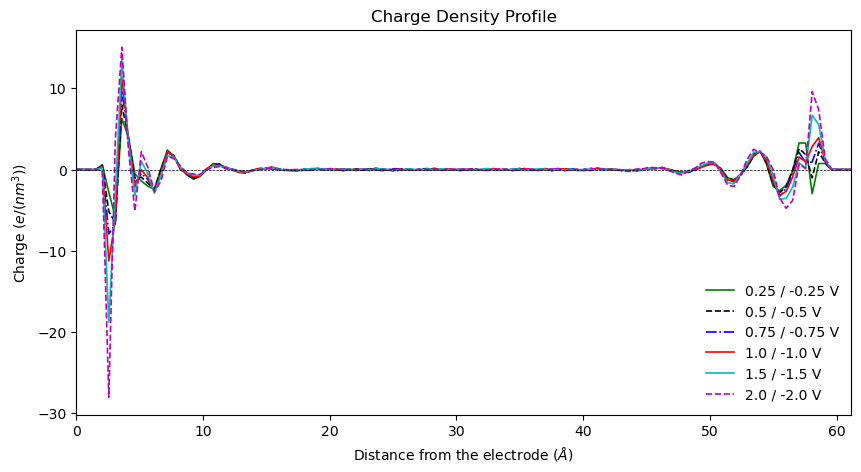

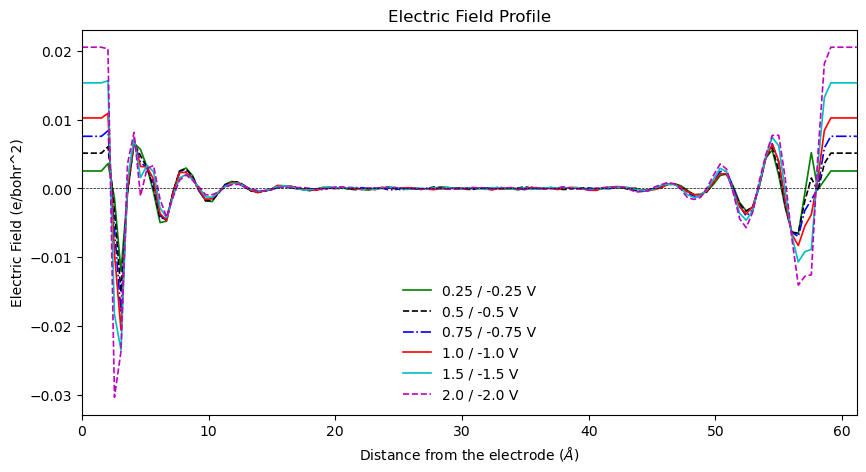

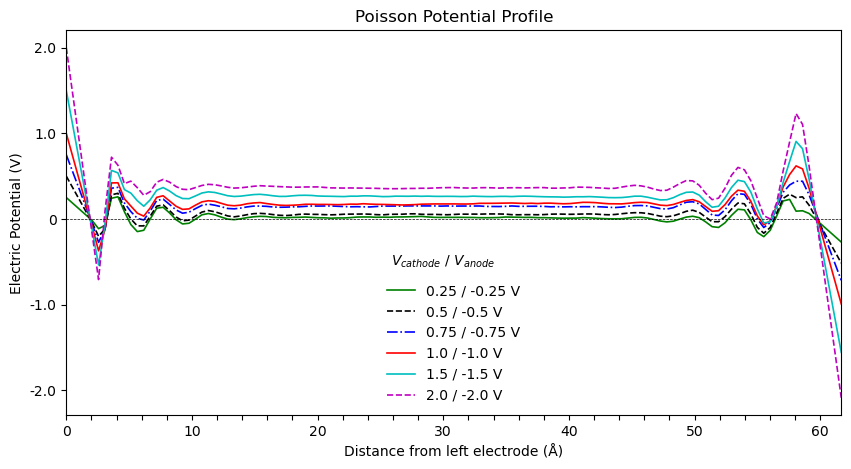

V_cat = 0.25, V_anod = -0.2702774091170729
Middle of the profile: Applied 0.5 V = 0.018478371323475233
V_cat = 0.5, V_anod = -0.5154570989128142
Middle of the profile: Applied 1.0 V = 0.052391309126626505
V_cat = 0.75, V_anod = -0.7173388159793188
Middle of the profile: Applied 1.5 V = 0.14991266288838592
V_cat = 1.0, V_anod = -0.9933030959944986
Middle of the profile: Applied 2.0 V = 0.17579956676307262
V_cat = 1.5, V_anod = -1.5584672095141632
Middle of the profile: Applied 3.0 V = 0.26385680621184826
V_cat = 2.0, V_anod = -2.0892458451948945
Middle of the profile: Applied 4.0 V = 0.36721246263128404
EDL Voltage Drop: -0.25 / 0.25 V = -0.2880258771509483 / 0.2322515319661246 V
EDL Voltage Drop: -0.5 / 0.5 V = -0.5694338026114873 / 0.44602329630132687 V
EDL Voltage Drop: -0.75 / 0.75 V = -0.8651379080908772 / 0.6022009078884416 V
EDL Voltage Drop: -1.0 / 1.0 V = -1.16930336213207 / 0.8239997338624285 V
EDL Voltage Drop: -1.5 / 1.5 V = -1.821873528219581 / 1.2365936812945821 V
EDL Volt

In [27]:
pdb_v1 = 'sim_output postion & trajectory & charge/sim_output_v0.5_ns_20/start_drudes.pdb'
dcd_v1 = 'sim_output postion & trajectory & charge/sim_output_v0.5_ns_20/FV_NVT.dcd'
u= mda.Universe(pdb_v1, dcd_v1)
grp_A = u.select_atoms('resname grp and segid A')
grp_B = u.select_atoms('resname grp and segid B')
grp_AB = grp_A | grp_B
num_bins = 120
electrode_z_positions = np.array(grp_AB.positions[:, 2])
bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
dz = bin_width
L_all = 120.447
V_app = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0]
Q_cat = [1.6126404675952444, 3.265805490436705, 4.82992280876615, 6.524527726205752, 9.772056656985765, 13.070575323649084]
V_init = [(V_init_i)/2 for V_init_i in V_app ]
NTCV = ["sim_output postion & trajectory & charge/sim_output_v0_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v0.5_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v1_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v1.5_ns_50/normalized_total_charge.dat",
    "sim_output postion & trajectory & charge/sim_output_v2_ns_50/normalized_total_charge.dat",
    'sim_output postion & trajectory & charge/sim_output_v3_ns_50/normalized_total_charge.dat',
    'sim_output postion & trajectory & charge/sim_output_v4_ns_50/normalized_total_charge.dat'
      ]

NTC_list=[]

for i in range(len(NTCV)):
    NTCV_list = NTC(NTCV[i])
    NTCV_lists = NTCV_list.NTCV_list()
    NTC_list.append(NTCV_lists)

colors = ['g', 'k', 'b', 'r','c', 'm', 'y']
linestyles= ['-', '--', '-.', '-', '-', '--','-.']
pos_pot = pospot(u, dz, L_all, V_app, Q_cat, V_init, NTC_list, electrode_z_positions, num_bins, bin_width)
pos_pot.plot_pospot(colors, linestyles)
pos_pot.cal_V_drop()

# Differential Capacitances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from numpy import linalg as LA

## Differential Capacitances Plot Class

In [2]:
class dCP:
    def __init__(self, area, V_app, voltages_drops_pos, voltages_drops_neg, Q_cathode, Q_anode):
        self.area= area
        self.V_app= V_app
        self.voltages_drops_pos= voltages_drops_pos
        self.voltages_drops_neg= voltages_drops_neg
        self.Q_cathode= Q_cathode
        self.Q_anode= Q_anode
    
    def cal_dCP(self):
        e_to_Coulomb= 1.602176634e-19
        angstrom_to_cm= 1e-8
        
        dV_pos=[]
        dV_neg=[]

        dQ_cathode = []
        dQ_anode = []

        dV_elec = []
        dC = []
        
        for i in range(len(V_app)-1):
            dV_pos_i = self.voltages_drops_pos[i+1] - self.voltages_drops_pos[i]
            dV_neg_i = self.voltages_drops_neg[i+1] - self.voltages_drops_neg[i]
            dQ_cathode_i = self.Q_cathode[i+1] - self.Q_cathode[i]
            dQ_anode_i = self.Q_anode[i+1] - self.Q_anode[i]
            dV_pos.append(dV_pos_i)
            dV_neg.append(dV_neg_i )
            dQ_cathode.append(dQ_cathode_i * e_to_Coulomb)
            dQ_anode.append(dQ_anode_i * e_to_Coulomb)
        
        for j in range(len(V_app)-1):
            dV_elec_neg_i = (self.voltages_drops_neg[j+1] + self.voltages_drops_neg[j]) / 2
            dV_elec.insert(0, dV_elec_neg_i)

        # Append positive values in the original order
        for j in range(len(V_app)-1):
            dV_elec_pos_i = (self.voltages_drops_pos[j+1] + self.voltages_drops_pos[j]) / 2
            dV_elec.append(dV_elec_pos_i)   

        for k in range (len(V_app)-1):
            dC_neg_i = (dQ_anode[k]) / (dV_neg[k])
            dC.insert(0, dC_neg_i)

        for k in range (len(V_app)-1):
            dC_pos_i = (dQ_cathode[k]) / (dV_pos[k])
            dC.append(dC_pos_i)
            
        dV_elec = [voltage_drop for voltage_drop in dV_elec]
        dC_uF_cm2 = [dC_val * 1e6 / (self.area * (angstrom_to_cm)**2 ) for dC_val in dC]
        Data = [dV_elec, dC_uF_cm2]
         
        return Data
        
    def plot_dCP(self, System_name, markers, linestyles, colors):
        Data= self.cal_dCP()
        
        plt.plot(Data[0], Data[1], label= System_name , marker=markers, linestyle=linestyles, color=colors, lw=1.2)
        plt.xlabel('$\Delta V_{electrode} $')
        plt.ylabel('$C_{D} (\mu F/(cm)^2)$')
        plt.axvline(0, color='black', linestyle='--', lw=0.5)
        # plt.ylim(0, )
        plt.legend(fontsize=10,frameon=False, loc='upper left')
        plt.show()

/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader current

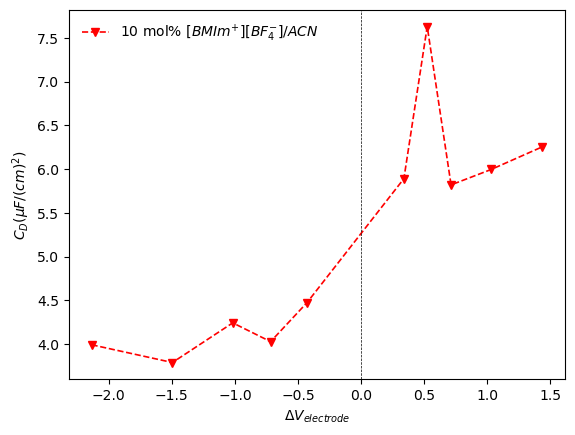

In [3]:
pdb_v1= 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/start_drudes.pdb'
dcd_v1= 'sim_output postion & trajectory & charge/sim_output_v1_ns_50/FV_NVT.dcd'
u= mda.Universe(pdb_v1,dcd_v1)
vec_x = u.trajectory[0].triclinic_dimensions[0]
vec_y = u.trajectory[0].triclinic_dimensions[1]
area = LA.norm( np.cross(vec_x, vec_y)) # unit is (angstrom)^2

V_app = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0]
voltages_drops_pos= [[0.2322515319661246, 0.44602329630132687, 0.6022009078884416, 0.8239997338624285, 1.2365936812945821, 1.6382665956609832]] # unit is eV
voltages_drops_neg= [[-0.2880258771509483, -0.5694338026114873, -0.8651379080908772, -1.16930336213207, -1.821873528219581, -2.450979249533911]]

Q_cathode = [[1.6126404675952444, 3.265805490436705, 4.82992280876615, 6.524527726205752, 9.772056656985765, 13.070575323649084]] # unit is e
Q_anode = [[-1.6126404675952593, -3.265805490436718, -4.829922808766164, -6.524527726205767, -9.77205665698578, -13.070575323649102]]

System_name= ['10 mol% $[BMIm^{+}] [BF_{4}^{-}] / ACN$']
markers = ['v']
linestyles= ['--']
colors = ['r']

for i in range(len(System_name)):
    dCP = dCP(area, V_app, voltages_drops_pos[i], voltages_drops_neg[i], Q_cathode[i], Q_anode[i])
    dCP.plot_dCP(System_name[i], markers[i], linestyles[i], colors[i])